In [72]:
%matplotlib inline
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [73]:
%%bash
tree assets

assets
├── matter-perturbatin-solver
│   ├── probtran-1e8.npy
│   ├── probtran-1e9.npy
│   ├── reconstructHamilList.csv
│   ├── reconstructHamilListx.csv
│   ├── reconstructHamilsList.csv
│   ├── reconstructHamilsListx.csv
│   ├── reconstructsingleProb22List.csv
│   ├── reconstructsingleProb22Listx.csv
│   ├── reconstructsingleProb22sList.csv
│   ├── reconstructsingleProb22sListx.csv
│   ├── reconstructsingleProb2List.csv
│   └── reconstructsingleProb2Listx.csv
├── two-freq-real-ize-prob0-1000-1.0.npy
├── two-freq-real-ize-prob0-1000000-1.0-1e-08.npy
├── two-freq-real-ize-prob0-1000000-1.0-1e-09.npy
├── two-freq-real-ize-prob0-1000000-1.0-1e-10.npy
├── two-freq-real-ize-prob0-1000000-1.0.npy
├── two-freq-real-ize-prob0-1000000-10.0-1e-08.npy
├── two-freq-real-ize-prob0-1000000-10.0-1e-09.npy
├── two-freq-real-ize-prob0-1000000-10.0-1e-10.npy
├── two-freq-real-ize-prob0-1000000-10.0-1e-13.npy
├── two-freq-real-ize-prob0-1000000-100.0-1e-05.npy
├── two-freq-real-ize-prob0-1000000-100.0-1

In [74]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import matplotlib.pylab as plt
import csv
import time

In [146]:
endpoint = 100000; # integration range
dx = 10.0; # step size
dx100 = 100000.0; # step size
lam0 = 0.845258; # in unit of omegam, omegam = 3.66619*10^-17
dellam = np.array([0.00003588645221954444, 0.06486364865874367]); # deltalambda/omegam
ks = [1.0,1.0/90]; # two k's
thm = 0.16212913985547778; # theta_m

psi0, x0 = [1.0, 0.0, 0.0, 0.0], 0 # initial condition
savestep = 1000; # save to file every savestep steps

In [147]:
def hamiltonian(x, deltalambda, k, thetam):
    
    return [[ 0,   0.5* np.sin(2*thetam) * ( deltalambda[0] * np.sin(k[0]*x) + deltalambda[1] * np.sin(k[1]*x) ) * np.exp( 1.0j * ( - x - np.cos(2*thetam) * (  ( deltalambda[0]/k[0] * np.cos(k[0]*x) + deltalambda[1]/k[1] * np.cos(k[1]*x) ) )  ) )     ],   [ 0.5* np.sin(2*thetam) * ( deltalambda[0] * np.sin(k[0]*x) + deltalambda[1] * np.sin(k[1]*x) ) * np.exp( -1.0j * ( - x - np.cos(2*thetam) * ( deltalambda[0] /k[0] * np.cos(k[0]*x) + deltalambda[1] /k[1] * np.cos(k[1]*x) )  ) ), 0 ]]   # Hamiltonian for double frequency

def hamiltonian4(x, deltalambda, k, thetam):
    hr = np.array(hamiltonian(x, deltalambda, k, thetam)).real;
    hi = np.array(hamiltonian(x, deltalambda, k, thetam)).imag;
    
    # Ordering of 
    
    return [[hi[0][0],hi[0][1],hr[0][0],hr[0][1]], [hi[1][0],hi[1][1],hr[1][0],hr[1][1]], [- hr[0][0], - hr[0][1], hi[0][0], hi[0][1]],  [- hr[1][0], - hr[1][1], hi[1][0], hi[1][1]] ]

def sysdpsidt(psi, x, deltalambda, k, thetam):
    
    return np.dot(hamiltonian4(x, deltalambda, k, thetam), [psi[0], psi[1], psi[2], psi[3]])

def sysjac(psi, x, deltalambda, k, thetam):
    
    return hamiltonian4(x, deltalambda, k, thetam)

In [148]:
def integral_tol(total_error_needed,totalrange, stepsize): # tolenrance of the integral that we require
    
    return total_error_needed*stepsize/totalrange

In [149]:
# Test the function
#hamiltonian4(10,dellam,ks,thm)
#hamiltonian(10,dellam,ks,thm)
integral_tol(1e-4,endpoint,dx)

1e-08

In [150]:
xlin = np.linspace(0, endpoint, np.floor(endpoint/dx) )
# xlin100 = np.linspace(0, endpoint, np.floor(endpoint/dx100) )
#print xlin

In [151]:
solodeint = odeint(sysdpsidt, psi0, xlin, args = (dellam,ks,thm), full_output = 1)

In [152]:
# solodeint100 = odeint(sysdpsidt, psi0, xlin100, args = (dellam,ks,thm), full_output = 1)

In [192]:
print solodeint[1]['message']
print solodeint[1]['nfe']

solodeint[1]

Integration successful.
[    85    145    217 ..., 584625 584697 584769]


{'hu': array([ 0.34066025,  0.28323117,  0.28323117, ...,  0.27927437,
         0.27927437,  0.27927437]),
 'imxer': -1,
 'leniw': 24,
 'lenrw': 84,
 'message': 'Integration successful.',
 'mused': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'nfe': array([    85,    145,    217, ..., 584625, 584697, 584769], dtype=int32),
 'nje': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'nqu': array([6, 6, 6, ..., 7, 7, 7], dtype=int32),
 'nst': array([    42,     71,    107, ..., 291569, 291605, 291641], dtype=int32),
 'tcur': array([  1.03275574e+01,   2.00344175e+01,   3.02307398e+01, ...,
          9.99800947e+04,   9.99901486e+04,   1.00000202e+05]),
 'tolsf': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'tsw': array([ 0.,  0.,  0., ...,  0.,  0.,  0.])}

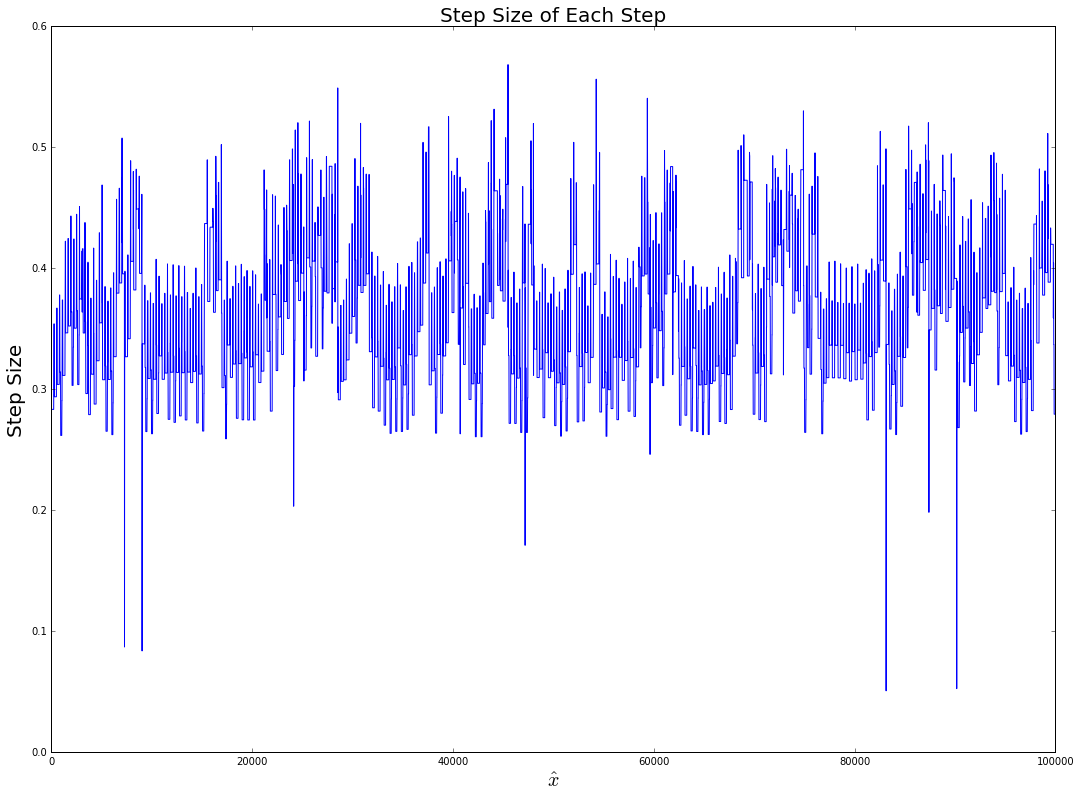

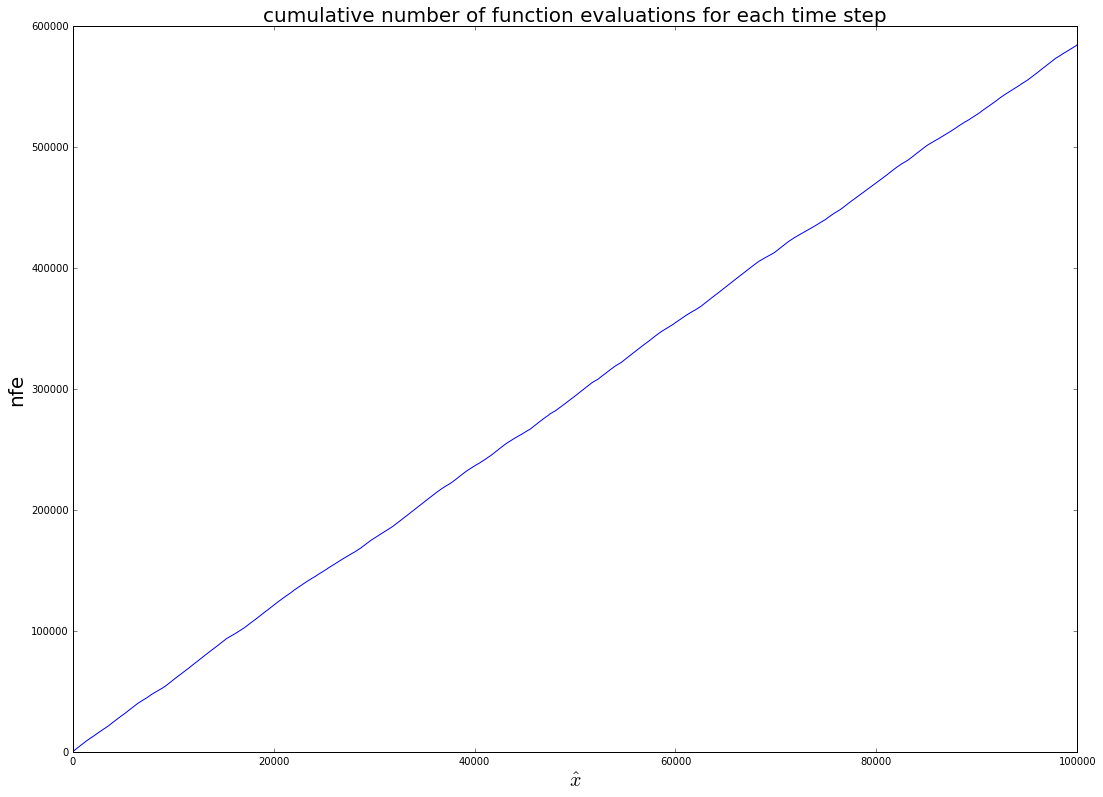

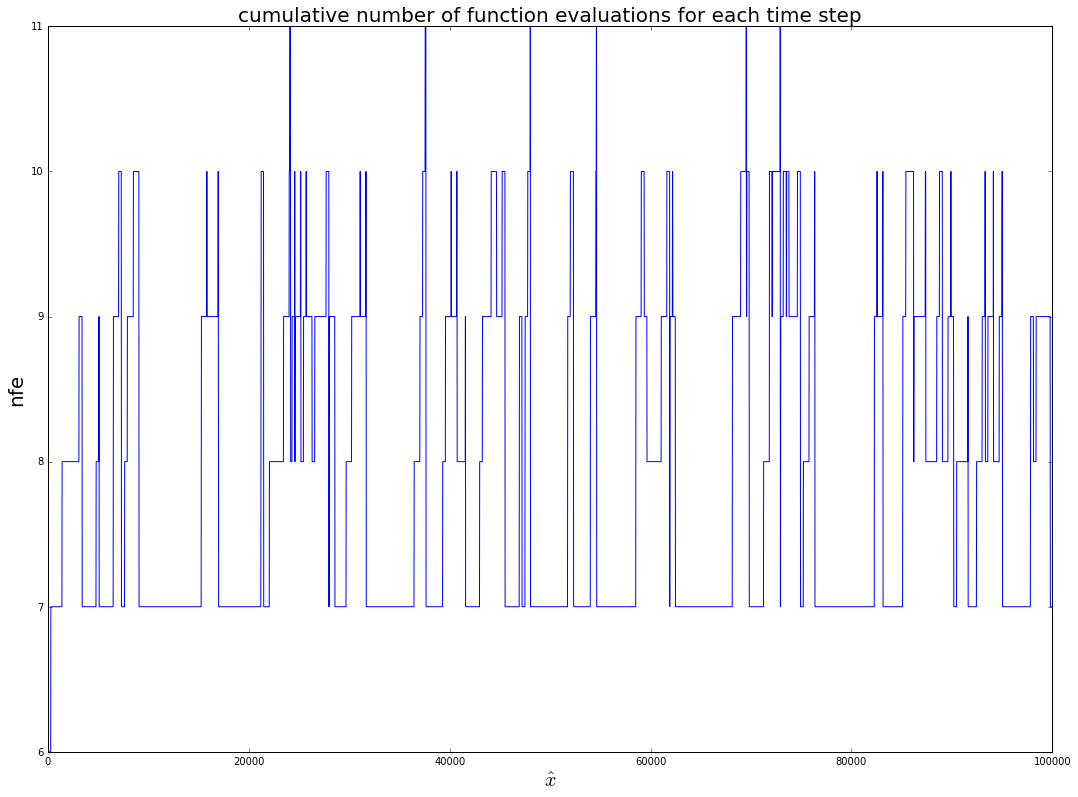

In [199]:
plt.figure(figsize=(18,13))

plt.plot(np.linspace(0, endpoint-dx, np.floor(endpoint/dx)-1 ),solodeint[1]['hu'])
plt.title('Step Size of Each Step',fontsize=20)
plt.ylabel('Step Size',fontsize=20)
plt.xlabel('$\hat x$',fontsize=20)
plt.show()

plt.figure(figsize=(18,13))

plt.plot(np.linspace(0, endpoint-dx, np.floor(endpoint/dx)-1 ),solodeint[1]['nfe'])
plt.title('cumulative number of function evaluations for each time step',fontsize=20)
plt.ylabel('nfe',fontsize=20)
plt.xlabel('$\hat x$',fontsize=20)
plt.show()

plt.figure(figsize=(18,13))

plt.plot(np.linspace(0, endpoint-dx, np.floor(endpoint/dx)-1 ),solodeint[1]['nqu'])
plt.title('cumulative number of function evaluations for each time step',fontsize=20)
plt.ylabel('nfe',fontsize=20)
plt.xlabel('$\hat x$',fontsize=20)
plt.show()

In [154]:
prob0=solodeint[0][:,0]**2+solodeint[0][:,2]**2
prob1=solodeint[0][:,1]**2+solodeint[0][:,3]**2

#prob0_100=solodeint100[0][:,0]**2+solodeint100[0][:,2]**2
#prob1_100=solodeint100[0][:,1]**2+solodeint100[0][:,3]**2

In [155]:
#print prob0, prob1, prob0+prob1
np.save("assets/odeint-range-"+str(endpoint)+"-step-"+str(dx)+"-prob0",prob0)
np.save("assets/odeint-range-"+str(endpoint)+"-step-"+str(dx)+"-prob1",prob1)
np.save("assets/odeint-range-"+str(endpoint)+"-step-"+str(dx)+"-xlin",xlin)

#print "odeint-range-"+str(endpoint)+"-step-"+str(dx)+"-prob0"

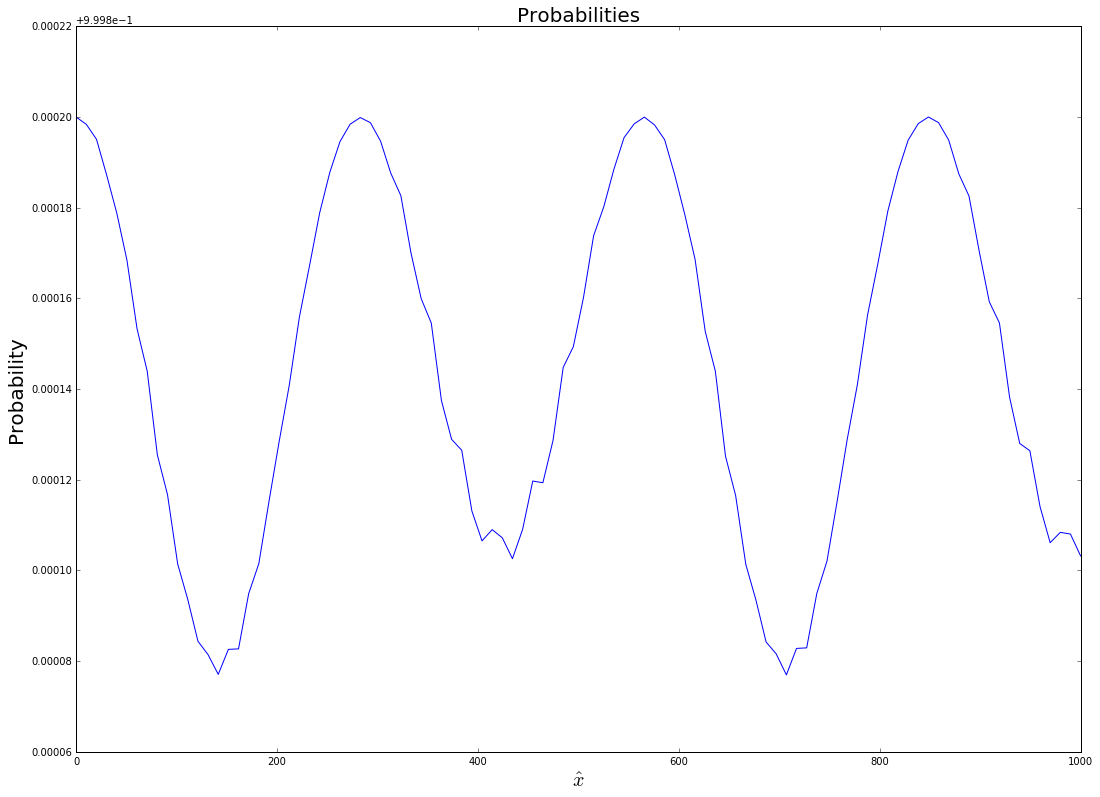

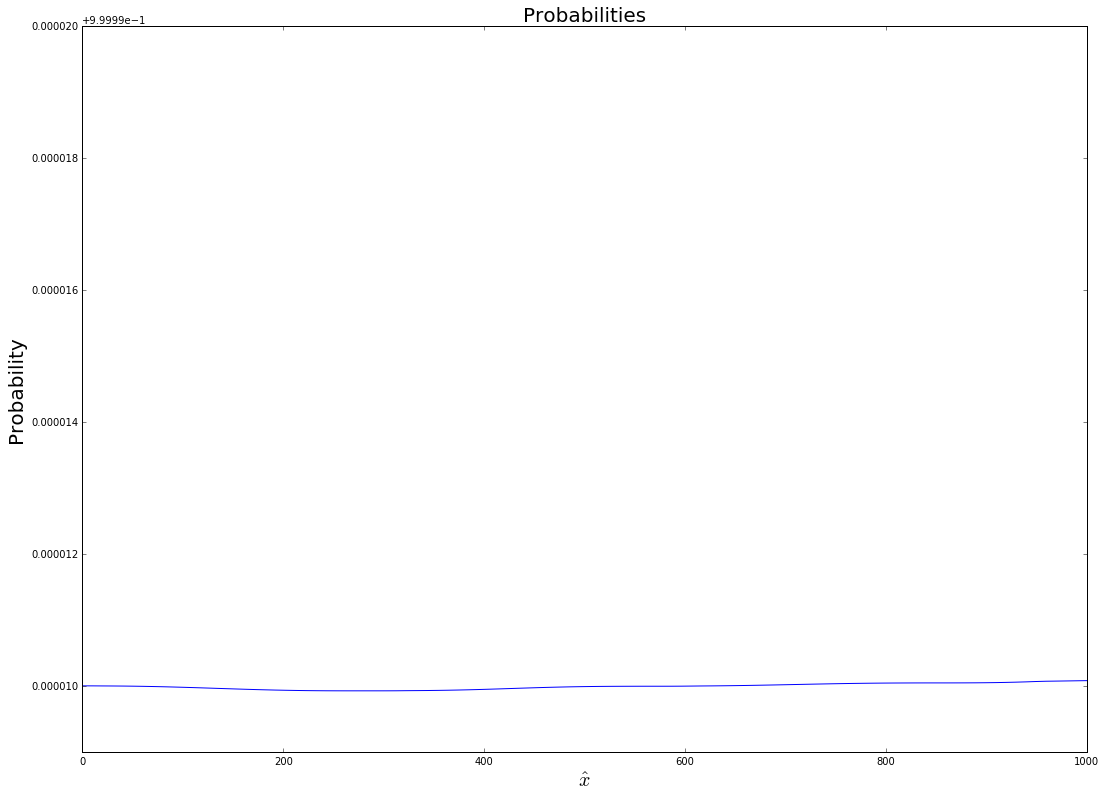

In [89]:
# plt.figure(figsize=(18,13))

# plt.plot(xlin, prob0,'-')
# plt.title("Probabilities",fontsize=20)
# plt.xlabel("$\hat x$",fontsize=20)
# plt.ylabel("Probability",fontsize=20)
# plt.show()

# plt.figure(figsize=(18,13))

# plt.plot(xlin, prob1,'-')
# plt.title("Probabilities",fontsize=20)
# plt.xlabel("$\hat x$",fontsize=20)
# plt.ylabel("Probability",fontsize=20)
# plt.show()

plt.figure(figsize=(18,13))

plt.plot(xlin, prob0+prob1, '-')
# plt.plot(xlin, prob0+prob1, '-', xlin100, prob0_100 + prob1_100,'*')
# plt.plot(xlin100, prob0_100 + prob1_100,'*')
plt.title("Probabilities",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.ylim([0.999999,1.00001])
plt.show()



In [5]:
import scipy
scipy.__version__

'0.17.1'

### Data Processing Unit

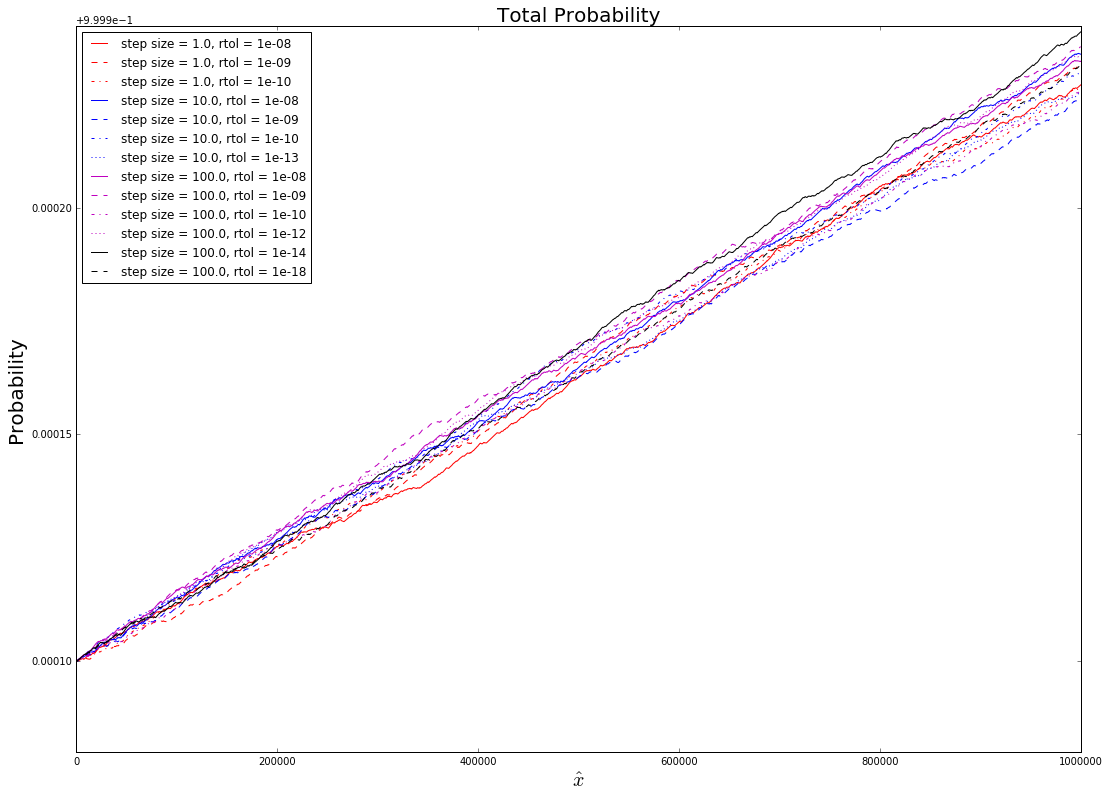

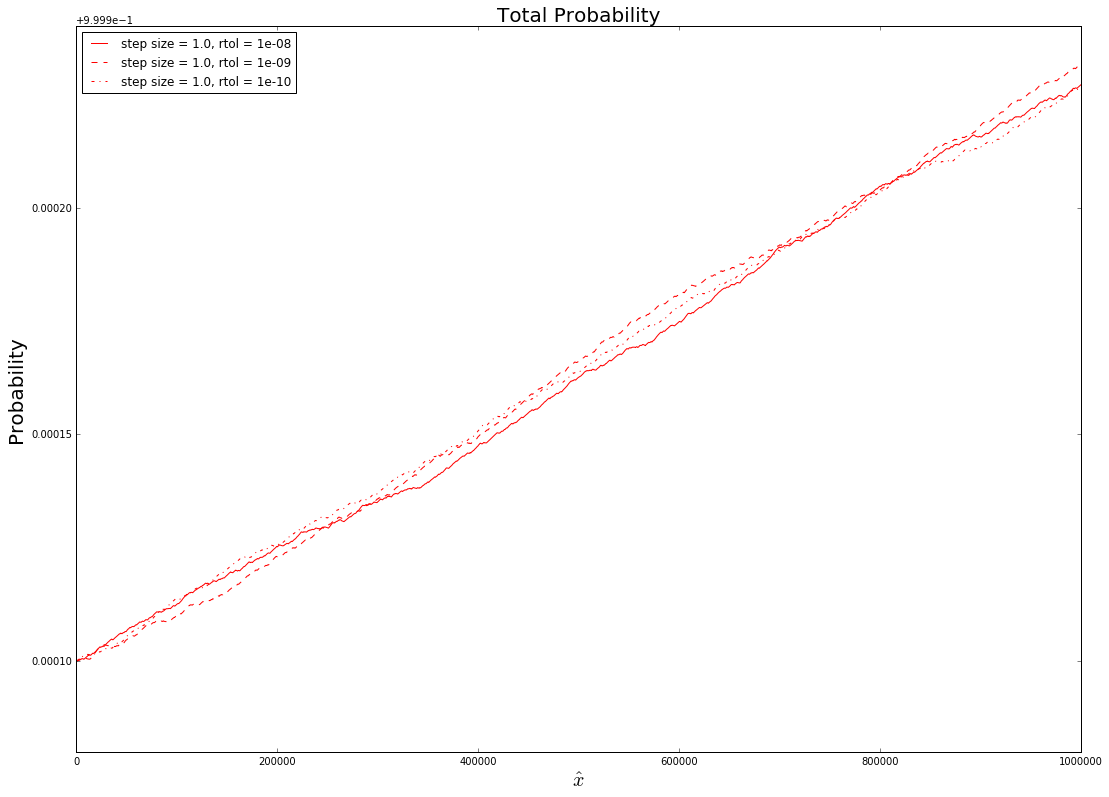

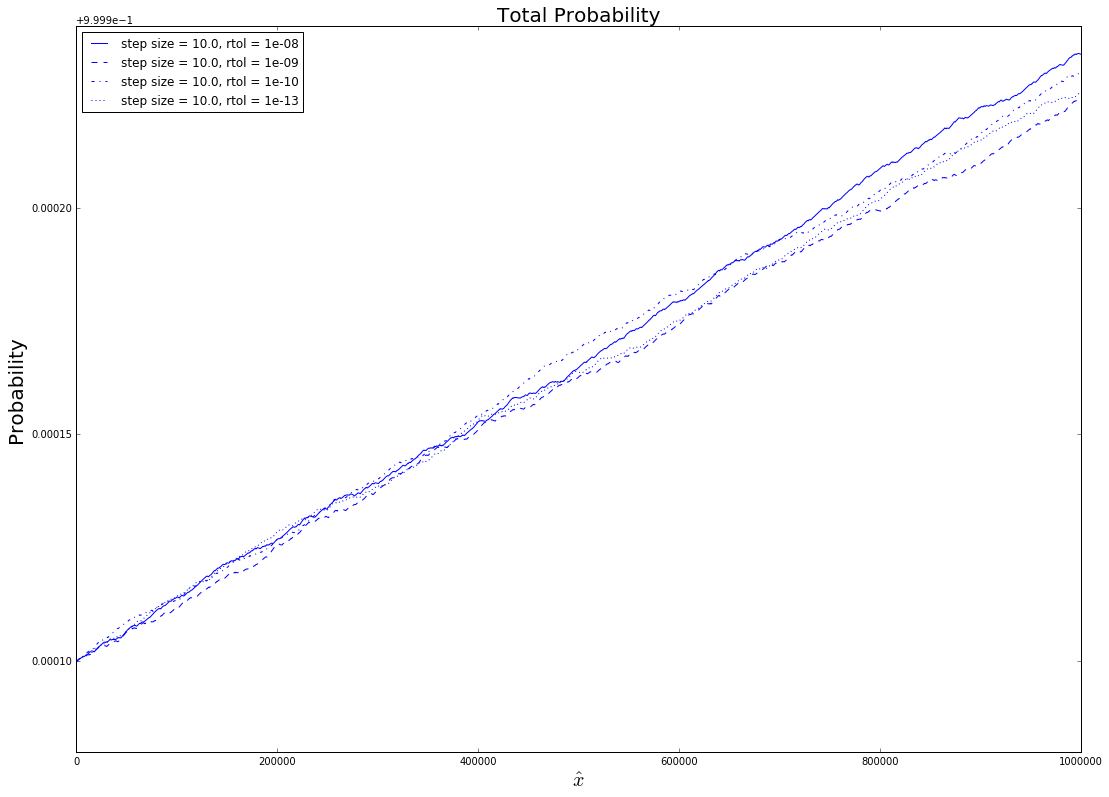

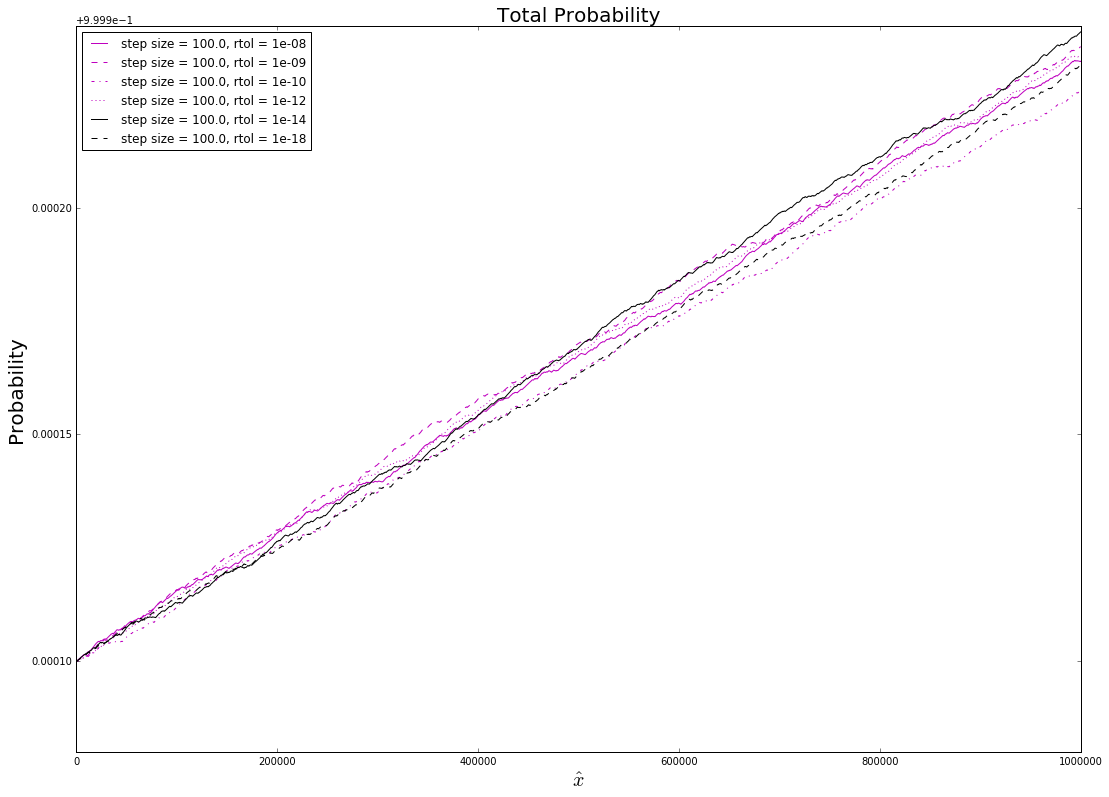

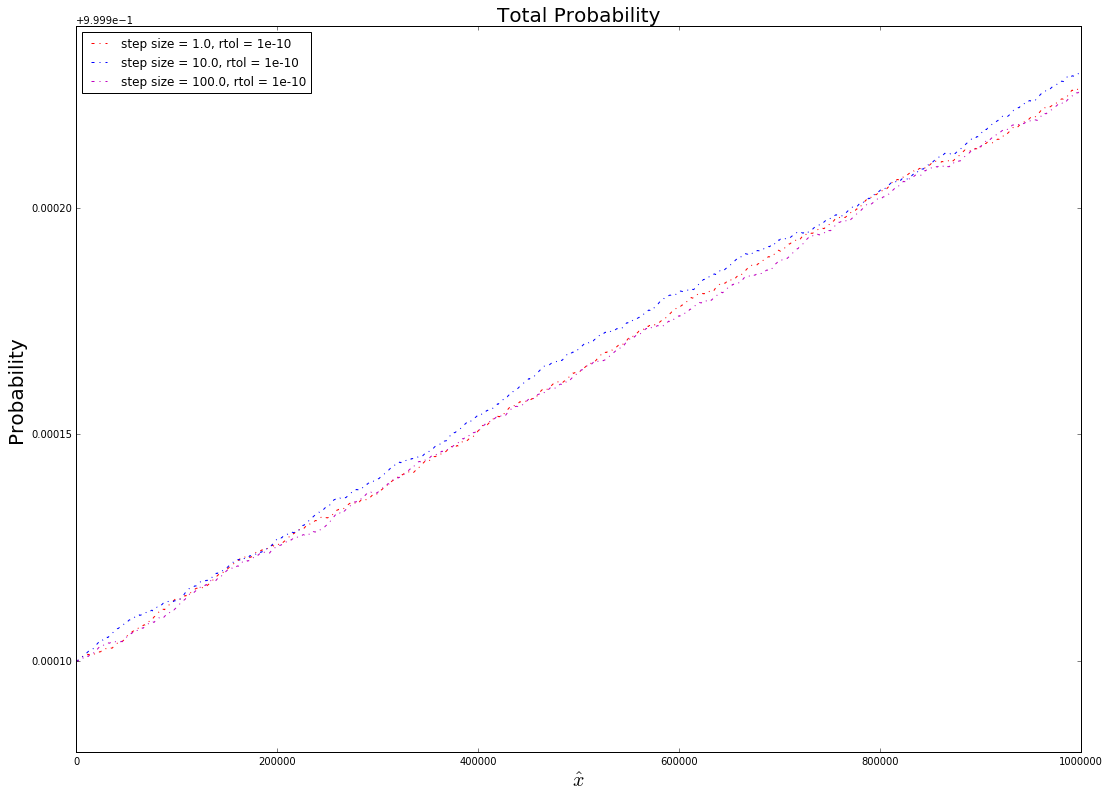

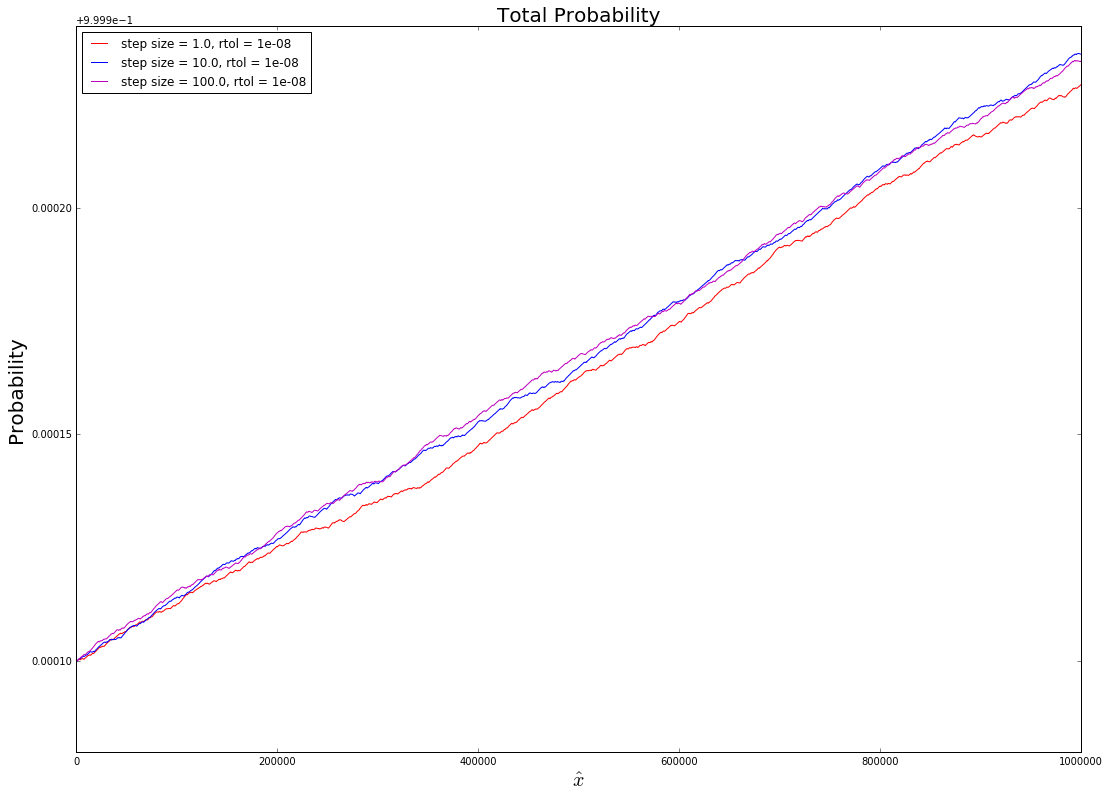

In [162]:
xlin_supernova = np.load("assets/two-freq-real-ize-xlin-1000000-1.0-1e-10.npy")
prob0_supernova = np.load("assets/two-freq-real-ize-prob0-1000000-1.0-1e-10.npy")
prob1_supernova = np.load("assets/two-freq-real-ize-prob1-1000000-1.0-1e-10.npy")

xlin_supernova_1_8 = np.load("assets/two-freq-real-ize-xlin-1000000-1.0-1e-08.npy")
prob0_supernova_1_8 = np.load("assets/two-freq-real-ize-prob0-1000000-1.0-1e-08.npy")
prob1_supernova_1_8 = np.load("assets/two-freq-real-ize-prob1-1000000-1.0-1e-08.npy")

xlin_supernova_1_9 = np.load("assets/two-freq-real-ize-xlin-1000000-1.0-1e-09.npy")
prob0_supernova_1_9 = np.load("assets/two-freq-real-ize-prob0-1000000-1.0-1e-09.npy")
prob1_supernova_1_9 = np.load("assets/two-freq-real-ize-prob1-1000000-1.0-1e-09.npy")

xlin_supernova2 = np.load("assets/two-freq-real-ize-xlin-1000000-10.0-1e-09.npy")
prob0_supernova2 = np.load("assets/two-freq-real-ize-prob0-1000000-10.0-1e-09.npy")
prob1_supernova2 = np.load("assets/two-freq-real-ize-prob1-1000000-10.0-1e-09.npy")

xlin_supernova_10_10 = np.load("assets/two-freq-real-ize-xlin-1000000-10.0-1e-10.npy")
prob0_supernova_10_10 = np.load("assets/two-freq-real-ize-prob0-1000000-10.0-1e-10.npy")
prob1_supernova_10_10 = np.load("assets/two-freq-real-ize-prob1-1000000-10.0-1e-10.npy")


xlin_supernova3 = np.load("assets/two-freq-real-ize-xlin-1000000-100.0-1e-08.npy")
prob0_supernova3 = np.load("assets/two-freq-real-ize-prob0-1000000-100.0-1e-08.npy")
prob1_supernova3 = np.load("assets/two-freq-real-ize-prob1-1000000-100.0-1e-08.npy")

xlin_supernova_100_9 = np.load("assets/two-freq-real-ize-xlin-1000000-100.0-1e-09.npy")
prob0_supernova_100_9 = np.load("assets/two-freq-real-ize-prob0-1000000-100.0-1e-09.npy")
prob1_supernova_100_9 = np.load("assets/two-freq-real-ize-prob1-1000000-100.0-1e-09.npy")

xlin_supernova_100_10 = np.load("assets/two-freq-real-ize-xlin-1000000-100.0-1e-10.npy")
prob0_supernova_100_10 = np.load("assets/two-freq-real-ize-prob0-1000000-100.0-1e-10.npy")
prob1_supernova_100_10 = np.load("assets/two-freq-real-ize-prob1-1000000-100.0-1e-10.npy")

xlin_supernova4 = np.load("assets/two-freq-real-ize-xlin-1000000-100.0-1e-12.npy")
prob0_supernova4 = np.load("assets/two-freq-real-ize-prob0-1000000-100.0-1e-12.npy")
prob1_supernova4 = np.load("assets/two-freq-real-ize-prob1-1000000-100.0-1e-12.npy")

xlin_supernova5 = np.load("assets/two-freq-real-ize-xlin-1000000-100.0-1e-14.npy")
prob0_supernova5 = np.load("assets/two-freq-real-ize-prob0-1000000-100.0-1e-14.npy")
prob1_supernova5 = np.load("assets/two-freq-real-ize-prob1-1000000-100.0-1e-14.npy")

xlin_supernova6 = np.load("assets/two-freq-real-ize-xlin-1000000-10.0-1e-13.npy")
prob0_supernova6 = np.load("assets/two-freq-real-ize-prob0-1000000-10.0-1e-13.npy")
prob1_supernova6 = np.load("assets/two-freq-real-ize-prob1-1000000-10.0-1e-13.npy")

xlin_supernova7 = np.load("assets/two-freq-real-ize-xlin-1000000-100.0-1e-05.npy")
prob0_supernova7 = np.load("assets/two-freq-real-ize-prob0-1000000-100.0-1e-05.npy")
prob1_supernova7 = np.load("assets/two-freq-real-ize-prob1-1000000-100.0-1e-05.npy")

xlin_supernova8 = np.load("assets/two-freq-real-ize-xlin-1000000-10.0-1e-08.npy")
prob0_supernova8 = np.load("assets/two-freq-real-ize-prob0-1000000-10.0-1e-08.npy")
prob1_supernova8 = np.load("assets/two-freq-real-ize-prob1-1000000-10.0-1e-08.npy")


xlin_supernova_100_18 = np.load("assets/two-freq-real-ize-xlin-1000000-100.0-1e-18.npy")
prob0_supernova_100_18 = np.load("assets/two-freq-real-ize-prob0-1000000-100.0-1e-18.npy")
prob1_supernova_100_18 = np.load("assets/two-freq-real-ize-prob1-1000000-100.0-1e-18.npy")




stepsize_figure = 1.0
rtol_figure = 1e-10

stepsize_figure_1_8 = 1.0
rtol_figure_1_8 = 1e-8

stepsize_figure_1_9 = 1.0
rtol_figure_1_9 = 1e-9


stepsize_figure2 = 10.0
rtol_figure2 = 1e-9

stepsize_figure_10_10 = 10.0
rtol_figure_10_10 = 1e-10

stepsize_figure6 = 10.0
rtol_figure6 = 1e-13

stepsize_figure3 = 100.0
rtol_figure3 = 1e-8

stepsize_figure_100_9 = 100.0
rtol_figure_100_9 = 1e-9

stepsize_figure_100_10 = 100.0
rtol_figure_100_10 = 1e-10

stepsize_figure4 = 100.0
rtol_figure4 = 1e-12

stepsize_figure5 = 100.0
rtol_figure5 = 1e-14

stepsize_figure_100_18 = 100.0
rtol_figure_100_18 = 1e-18

stepsize_figure7 = 100.0
rtol_figure7 = 1e-5

stepsize_figure8 = 10.0
rtol_figure8 = 1e-8


# plt.figure(figsize=(18,13))

# plt.plot(xlin_supernova, prob0_supernova,'-')
# plt.title("Probability $P_{1\\to1}$ (step="+str(stepsize_figure) + ", rtol =" + str(rtol_figure) +")",fontsize=20)
# plt.xlabel("$\hat x$",fontsize=20)
# plt.ylabel("Probability",fontsize=20)
# plt.show()


# plt.figure(figsize=(18,13))

# plt.plot(xlin_supernova, prob1_supernova,'-')
# plt.title("Probability $P_{1\\to2}$ (step="+str(stepsize_figure)+")",fontsize=20)
# plt.xlabel("$\hat x$",fontsize=20)
# plt.ylabel("Probability",fontsize=20)
# plt.show()

# plt.figure(figsize=(18,13))

# plt.plot(xlin_supernova, prob1_supernova+prob0_supernova,'r-')
# plt.title("Total Probability (step="+str(stepsize_figure)+")",fontsize=20)
# plt.xlabel("$\hat x$",fontsize=20)
# plt.ylabel("Probability",fontsize=20)
# plt.show()



plt.figure(figsize=(18,13))

plt.plot(xlin_supernova_1_8, prob1_supernova_1_8 + prob0_supernova_1_8,'r-', label="step size = "+str(stepsize_figure_1_8) + ", rtol = " + str(rtol_figure_1_8) )
plt.plot(xlin_supernova_1_9, prob1_supernova_1_9 + prob0_supernova_1_9,'r--', label="step size = "+str(stepsize_figure_1_9) + ", rtol = " + str(rtol_figure_1_9) )
plt.plot(xlin_supernova, prob1_supernova+prob0_supernova,'r-.', label="step size = "+str(stepsize_figure) + ", rtol = " + str(rtol_figure) )
plt.plot(xlin_supernova8, prob1_supernova8+prob0_supernova8,'b-', label="step size = "+str(stepsize_figure8) + ", rtol = " + str(rtol_figure8))
plt.plot(xlin_supernova2, prob1_supernova2+prob0_supernova2,'b--', label="step size = "+str(stepsize_figure2) + ", rtol = " + str(rtol_figure2) )
plt.plot(xlin_supernova_10_10, prob1_supernova_10_10 + prob0_supernova_10_10,'b-.', label="step size = "+str(stepsize_figure_10_10) + ", rtol = " + str(rtol_figure_10_10) )
plt.plot(xlin_supernova6, prob1_supernova6+prob0_supernova6,'b:', label="step size = "+str(stepsize_figure6) + ", rtol = " + str(rtol_figure6) )
plt.plot(xlin_supernova3, prob1_supernova3+prob0_supernova3,'m-',label="step size = "+str(stepsize_figure3) + ", rtol = " + str(rtol_figure3) )
plt.plot(xlin_supernova_100_9, prob1_supernova_100_9 + prob0_supernova_100_9,'m--',label="step size = "+str(stepsize_figure_100_9) + ", rtol = " + str(rtol_figure_100_9) )
plt.plot(xlin_supernova_100_10, prob1_supernova_100_10 + prob0_supernova_100_10,'m-.',label="step size = "+str(stepsize_figure_100_10) + ", rtol = " + str(rtol_figure_100_10) )
plt.plot(xlin_supernova4, prob1_supernova4+prob0_supernova4,'m:',label="step size = "+str(stepsize_figure4) + ", rtol = " + str(rtol_figure4) )
plt.plot(xlin_supernova5, prob1_supernova5+prob0_supernova5,'k-', label="step size = "+str(stepsize_figure5) + ", rtol = " + str(rtol_figure5))
plt.plot(xlin_supernova_100_18, prob1_supernova_100_18 + prob0_supernova_100_18,'k--', label="step size = "+str(stepsize_figure_100_18) + ", rtol = " + str(rtol_figure_100_18))
#plt.plot(xlin_supernova7, prob1_supernova7+prob0_supernova7,'m:', label="step size = "+str(stepsize_figure7) + ", rtol = " + str(rtol_figure7))

plt.title("Total Probability",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend(loc="upper left")
plt.show()


plt.figure(figsize=(18,13))
plt.plot(xlin_supernova_1_8, prob1_supernova_1_8 + prob0_supernova_1_8,'r-', label="step size = "+str(stepsize_figure_1_8) + ", rtol = " + str(rtol_figure_1_8) )
plt.plot(xlin_supernova_1_9, prob1_supernova_1_9 + prob0_supernova_1_9,'r--', label="step size = "+str(stepsize_figure_1_9) + ", rtol = " + str(rtol_figure_1_9) )
plt.plot(xlin_supernova, prob1_supernova+prob0_supernova,'r-.', label="step size = "+str(stepsize_figure) + ", rtol = " + str(rtol_figure) )

plt.title("Total Probability",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(18,13))
plt.plot(xlin_supernova8, prob1_supernova8+prob0_supernova8,'b-', label="step size = "+str(stepsize_figure8) + ", rtol = " + str(rtol_figure8))
plt.plot(xlin_supernova2, prob1_supernova2+prob0_supernova2,'b--', label="step size = "+str(stepsize_figure2) + ", rtol = " + str(rtol_figure2) )
plt.plot(xlin_supernova_10_10, prob1_supernova_10_10 + prob0_supernova_10_10,'b-.', label="step size = "+str(stepsize_figure_10_10) + ", rtol = " + str(rtol_figure_10_10) )
plt.plot(xlin_supernova6, prob1_supernova6+prob0_supernova6,'b:', label="step size = "+str(stepsize_figure6) + ", rtol = " + str(rtol_figure6) )

plt.title("Total Probability",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(18,13))
plt.plot(xlin_supernova3, prob1_supernova3+prob0_supernova3,'m-',label="step size = "+str(stepsize_figure3) + ", rtol = " + str(rtol_figure3) )
plt.plot(xlin_supernova_100_9, prob1_supernova_100_9 + prob0_supernova_100_9,'m--',label="step size = "+str(stepsize_figure_100_9) + ", rtol = " + str(rtol_figure_100_9) )
plt.plot(xlin_supernova_100_10, prob1_supernova_100_10 + prob0_supernova_100_10,'m-.',label="step size = "+str(stepsize_figure_100_10) + ", rtol = " + str(rtol_figure_100_10) )
plt.plot(xlin_supernova4, prob1_supernova4+prob0_supernova4,'m:',label="step size = "+str(stepsize_figure4) + ", rtol = " + str(rtol_figure4) )
plt.plot(xlin_supernova5, prob1_supernova5+prob0_supernova5,'k-', label="step size = "+str(stepsize_figure5) + ", rtol = " + str(rtol_figure5))
plt.plot(xlin_supernova_100_18, prob1_supernova_100_18 + prob0_supernova_100_18,'k--', label="step size = "+str(stepsize_figure_100_18) + ", rtol = " + str(rtol_figure_100_18))
#plt.plot(xlin_supernova7, prob1_supernova7+prob0_supernova7,'k-.', label="step size = "+str(stepsize_figure7) + ", rtol = " + str(rtol_figure7))

plt.title("Total Probability",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend(loc="upper left")
plt.show()



plt.figure(figsize=(18,13))
plt.plot(xlin_supernova, prob1_supernova+prob0_supernova,'r-.', label="step size = "+str(stepsize_figure) + ", rtol = " + str(rtol_figure) )
plt.plot(xlin_supernova_10_10, prob1_supernova_10_10 + prob0_supernova_10_10,'b-.', label="step size = "+str(stepsize_figure_10_10) + ", rtol = " + str(rtol_figure_10_10) )
plt.plot(xlin_supernova_100_10, prob1_supernova_100_10 + prob0_supernova_100_10,'m-.',label="step size = "+str(stepsize_figure_100_10) + ", rtol = " + str(rtol_figure_100_10) )
#plt.plot(xlin_supernova7, prob1_supernova7+prob0_supernova7,'m:', label="step size = "+str(stepsize_figure7) + ", rtol = " + str(rtol_figure7))

plt.title("Total Probability",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend(loc="upper left")
plt.show()


plt.figure(figsize=(18,13))
plt.plot(xlin_supernova_1_8, prob1_supernova_1_8 + prob0_supernova_1_8,'r-', label="step size = "+str(stepsize_figure_1_8) + ", rtol = " + str(rtol_figure_1_8) )
plt.plot(xlin_supernova8, prob1_supernova8+prob0_supernova8,'b-', label="step size = "+str(stepsize_figure8) + ", rtol = " + str(rtol_figure8))
plt.plot(xlin_supernova3, prob1_supernova3+prob0_supernova3,'m-',label="step size = "+str(stepsize_figure3) + ", rtol = " + str(rtol_figure3) )

plt.title("Total Probability",fontsize=20)
plt.xlabel("$\hat x$",fontsize=20)
plt.ylabel("Probability",fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Examples of odeint

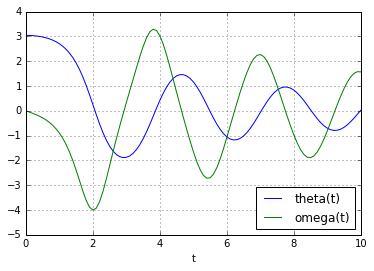

In [33]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]

t = np.linspace(0, 10, 101)

sol = odeint(pend, y0, t, args=(b, c),full_output=1)


plt.plot(t, sol[0][:, 0], 'b', label='theta(t)')
plt.plot(t, sol[0][:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [36]:
sol[1]

{'hu': array([ 0.02909913,  0.02909913,  0.02909913,  0.02461187,  0.04466197,
         0.04466197,  0.04975119,  0.04975119,  0.0394766 ,  0.0394766 ,
         0.0324055 ,  0.0324055 ,  0.0324055 ,  0.03697811,  0.03697811,
         0.03064065,  0.03064065,  0.03064065,  0.02819459,  0.02819459,
         0.02819459,  0.02819459,  0.02819459,  0.02819459,  0.03341736,
         0.03341736,  0.03341736,  0.03341736,  0.04176933,  0.03479012,
         0.03479012,  0.03479012,  0.03487164,  0.03487164,  0.03487164,
         0.03487164,  0.03487164,  0.02855564,  0.02855564,  0.02855564,
         0.03357137,  0.03357137,  0.03357137,  0.03754137,  0.03754137,
         0.03754137,  0.03754137,  0.05093141,  0.05093141,  0.05093141,
         0.05093141,  0.04016459,  0.04016459,  0.04016459,  0.04016459,
         0.04016459,  0.04016459,  0.04016459,  0.04016459,  0.04016459,
         0.04016459,  0.04974618,  0.0414047 ,  0.0414047 ,  0.0414047 ,
         0.05626441,  0.05626441,  0.05626441